In [1]:
using CategoricalArrays

function load_dataset(Y_name)
    # Loading and preprocessing
    forest_fires = CSV.read("../data/forestfires.csv", DataFrame)
    forest_fires.month = levelcode.(CategoricalArray(forest_fires.month))
    forest_fires.day = levelcode.(CategoricalArray(forest_fires.day))
    forest_fires = mapcols(col -> Float32.(col), forest_fires)

    # Getting X and Y
    X = select(forest_fires, Not(Y_name))
    Y = select(forest_fires, Y_name)
    return Matrix(X)', Matrix(Y)'
end

load_dataset (generic function with 1 method)

In [3]:
using Mlyn, CSV, DataFrames

X, Y = load_dataset(:rain)
X_train, Y_train, X_test, Y_test = train_test_split(X, Y, 0.8)

(Float32[4.0 2.0 … 6.0 6.0; 4.0 4.0 … 3.0 5.0; … ; 2.7 2.2 … 2.2 6.3; 0.0 6.04 … 56.04 19.23], Float32[0.0 0.0 … 0.0 0.0], Float32[4.0 2.0 … 6.0 1.0; 4.0 4.0 … 5.0 4.0; … ; 8.5 5.8 … 4.0 2.2; 22.03 54.29 … 0.17 8.12], Float32[0.0 0.0 … 0.0 0.0])

In [4]:
using Mlyn

function get_model()
    return create_model(regression, [
        BlueprintLinear(12, 5, method_xavier_normal),
        BlueprintActivation(method_sigmoid),
        BlueprintLinear(5, 3, method_xavier_normal),
        BlueprintActivation(method_sigmoid),
        BlueprintLinear(3, 1, method_xavier_normal),
        BlueprintActivation(method_sigmoid)
    ])
end

get_model (generic function with 1 method)

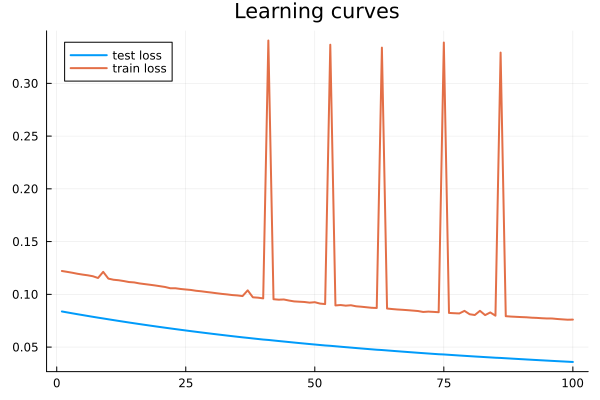

In [7]:
model = get_model()
optimizer = OptimizerSGD(learning_rate=0.01)
history = train!(model, optimizer, 100, X_train, Y_train, X_test, Y_test; batch_size=100, logging=false)
history_plot(history)

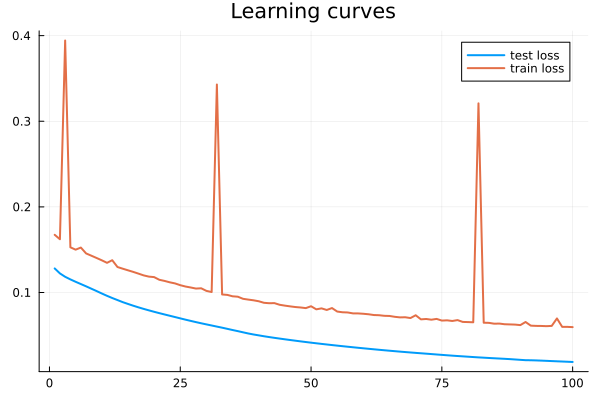

In [8]:
model = get_model()
optimizer = OptimizerAdam()
init_adam!(optimizer, model.layers)
history = train!(model, optimizer, 100, X_train, Y_train, X_test, Y_test; batch_size=100, logging=false)
history_plot(history)

In [10]:
X, Y = load_dataset(:area)
X_train, Y_train, X_test, Y_test = train_test_split(X, Y, 0.8)

(Float32[4.0 6.0 … 2.0 9.0; 3.0 3.0 … 4.0 9.0; … ; 4.9 4.5 … 3.6 4.5; 0.0 0.0 … 0.0 0.0], Float32[0.0 0.0 … 2.07 2.75], Float32[3.0 5.0 … 1.0 6.0; 4.0 4.0 … 2.0 5.0; … ; 2.2 3.6 … 8.5 5.8; 0.0 0.0 … 0.0 0.0], Float32[14.68 3.71 … 0.0 0.0])

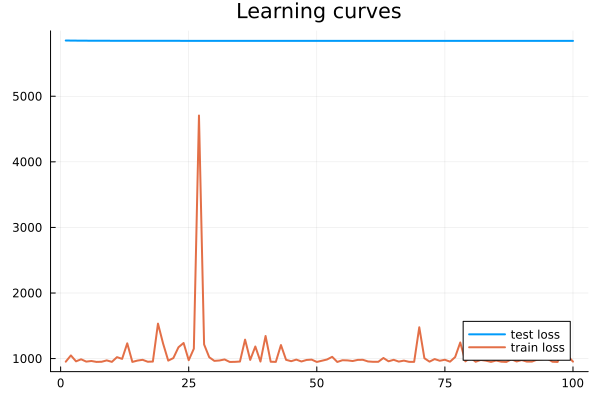

In [14]:
model = get_model()
optimizer = OptimizerSGD(learning_rate=0.01)
history = train!(model, optimizer, 100, X_train, Y_train, X_test, Y_test; batch_size=100, logging = false)
history_plot(history)

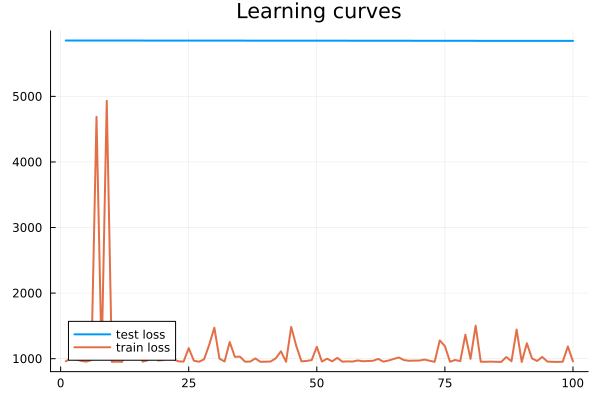

In [15]:
model = get_model()
optimizer = OptimizerAdam()
init_adam!(optimizer, model.layers)
history = train!(model, optimizer, 100, X_train, Y_train, X_test, Y_test; batch_size=100, logging = false)
history_plot(history)